5. Qual o fator determinante para que o banco exija um seguro de crédito?

In [5]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

dataset_total = pd.read_csv('bank-full.csv', sep = ';')

In [3]:
def_no = dataset_total[dataset_total.default == 'no']

In [4]:
def_no.describe()

,age,balance,day,duration,campaign,pdays,previous
count,44396.000000,44396.000000,44396.000000,44396.000000,44396.000000,44396.000000,44396.000000
mean,40.961934,1389.806424,15.795792,258.512749,2.756780,40.604536,0.586044
std,10.638882,3063.275425,8.317696,258.239396,3.087038,100.504630,2.313596
min,18.000000,-4057.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,84.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,468.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1462.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
def_no_mari = def_no.groupby('marital').size()
print(def_no_mari)

marital
divorced     5079
married     26766
single      12551
dtype: int64


In [7]:
def_no_job = def_no.groupby('job').size()
print(def_no_job)

job
admin.           5097
blue-collar      9531
entrepreneur     1432
housemaid        1218
management       9294
retired          2238
self-employed    1546
services         4079
student           935
technician       7467
unemployed       1273
unknown           286
dtype: int64


In [8]:
def_no_edu = def_no.groupby('education').size()
print(def_no_edu)

education
primary       6724
secondary    22744
tertiary     13103
unknown       1825
dtype: int64


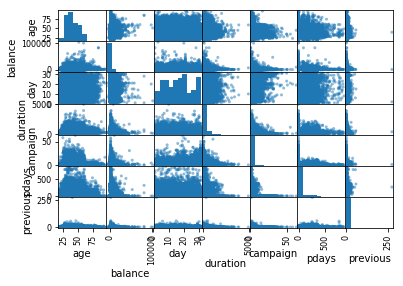

In [8]:
scatter_matrix(dataset_total)
plt.show()